In [6]:
import matplotlib.pyplot as plt
from data_analysis import data_analysis
import numpy as np
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors


algo_colors = {'synchronous': plt.cm.viridis(0.1), 'naive': plt.cm.viridis(0.4), 'linear': plt.cm.viridis(0.6), 'sketch': plt.cm.viridis(0.8)}
algo_labels = {'synchronous': 'Synchronous', 'naive': 'Naive FDA', 'linear': 'Linear FDA', 'sketch': 'Sketch FDA'}

## Accuracy / Syncs
### Variable: clients

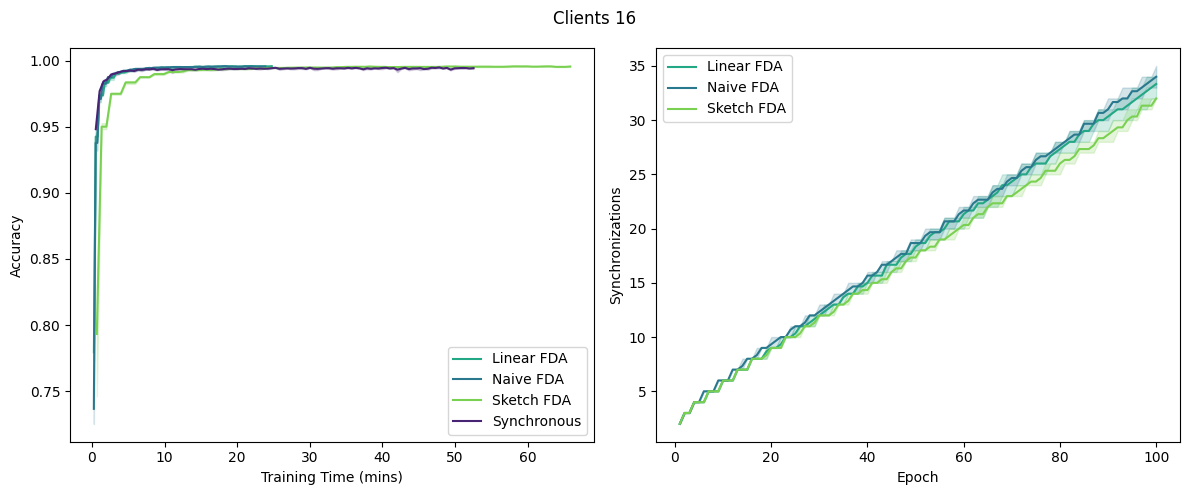

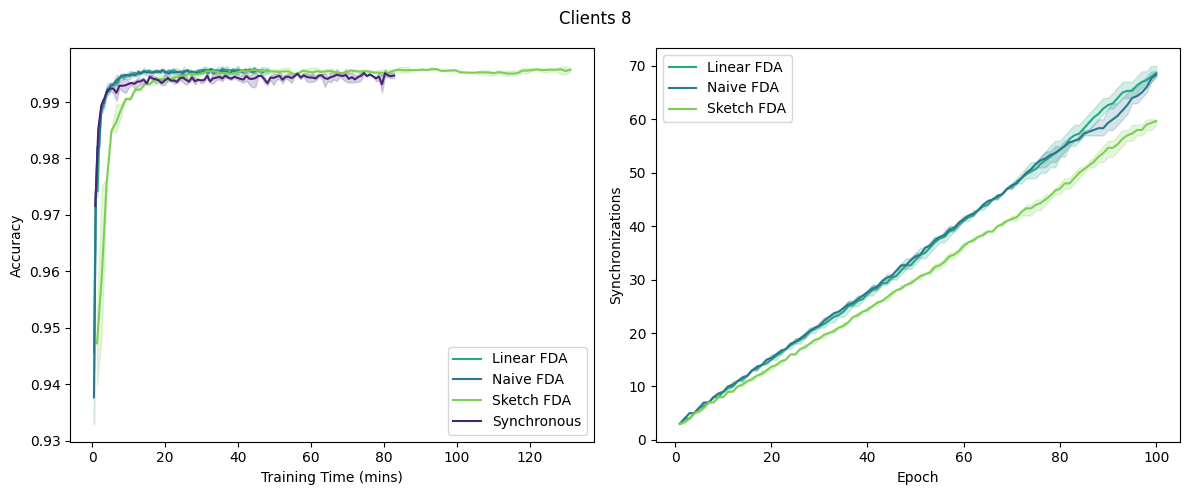

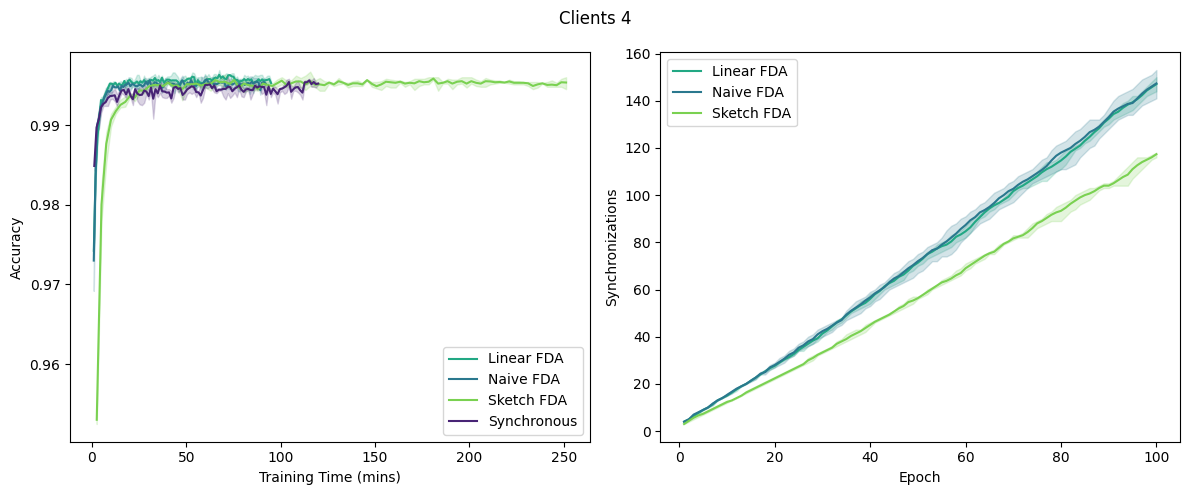

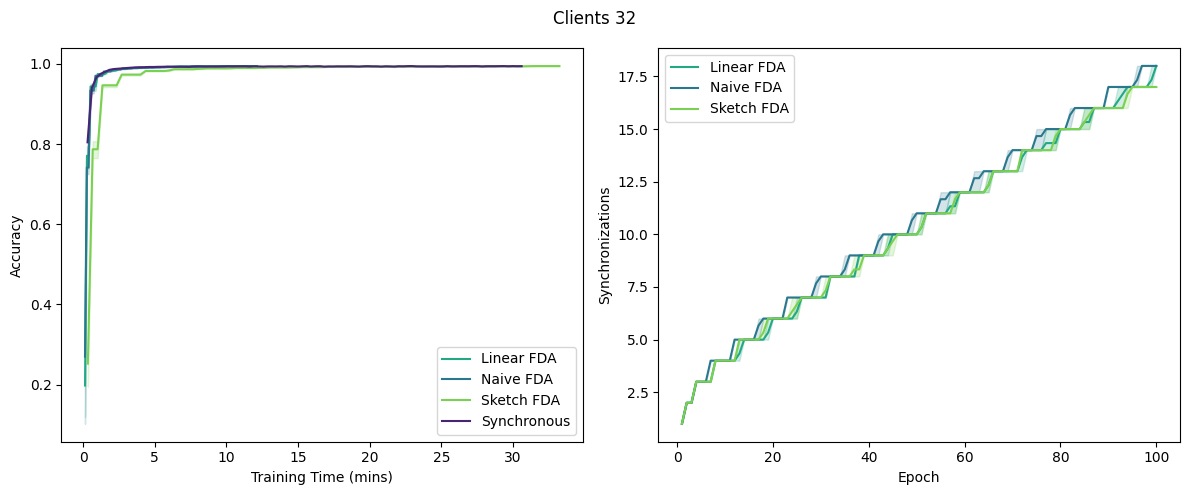

In [7]:
da = data_analysis("last_expers")
da.select_where({'batch_size': 128, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
distinct_clients = da.df['info']['clients'].unique()

# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]
    filtered_syncs_df = syncs_df[(syncs_df['clients'] == clients) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    fig.suptitle(f"Clients {clients}")
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

### Variable: batch size

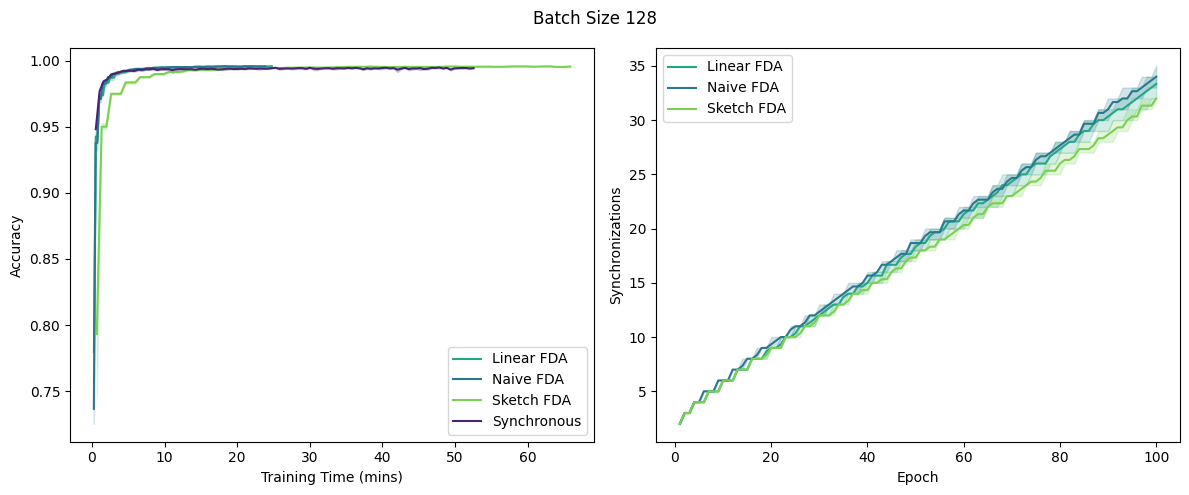

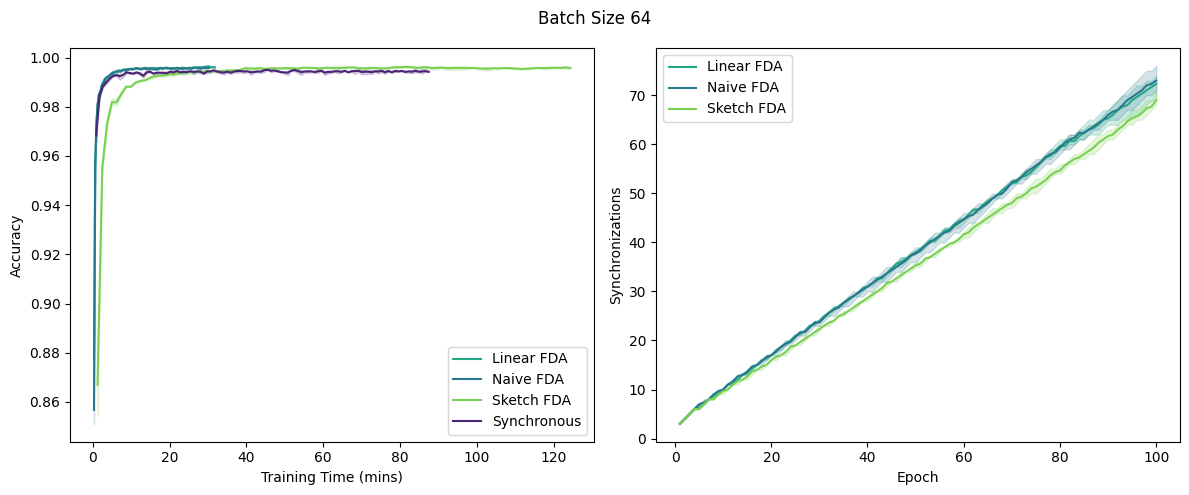

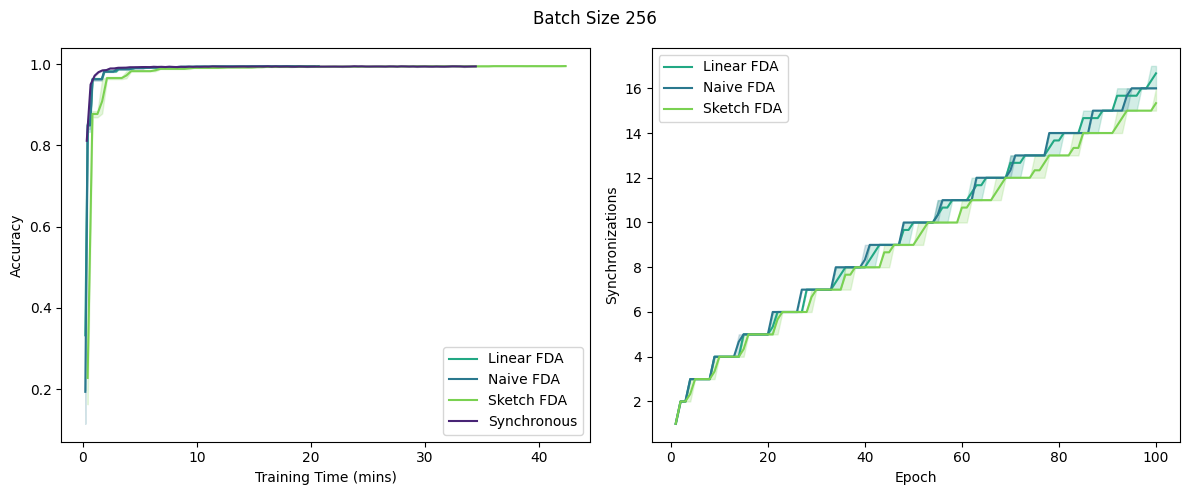

In [8]:
da = data_analysis("last_expers")
da.select_where({'clients': 16, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
distinct_batch_size = da.df['info']['batch_size'].unique()

# For each individual number of batch_size
for batch_size in distinct_batch_size:
    # Filter the DataFrame for rows where 'batch_size' column is equal to the current 'batch_size'
    filtered_accuracy_df = accuracy_df[accuracy_df['batch_size'] == batch_size]
    filtered_syncs_df = syncs_df[(syncs_df['batch_size'] == batch_size) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    fig.suptitle(f"Batch Size {batch_size}")
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


### Variable: threshold

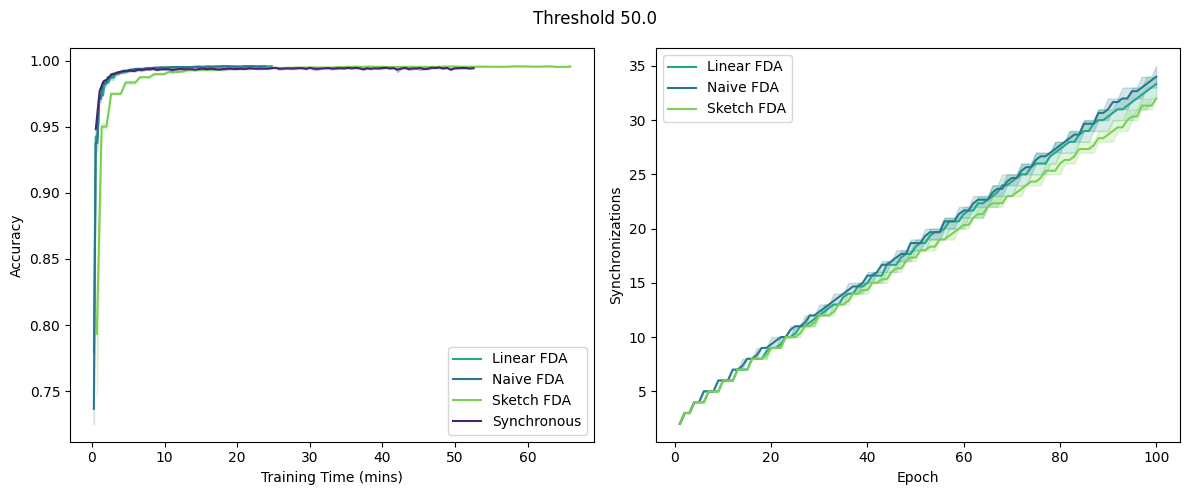

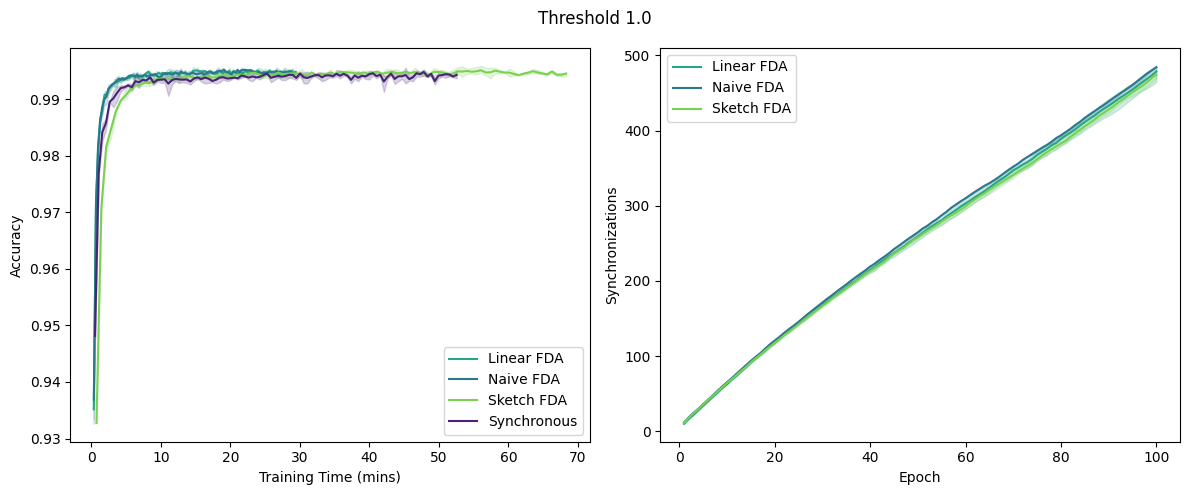

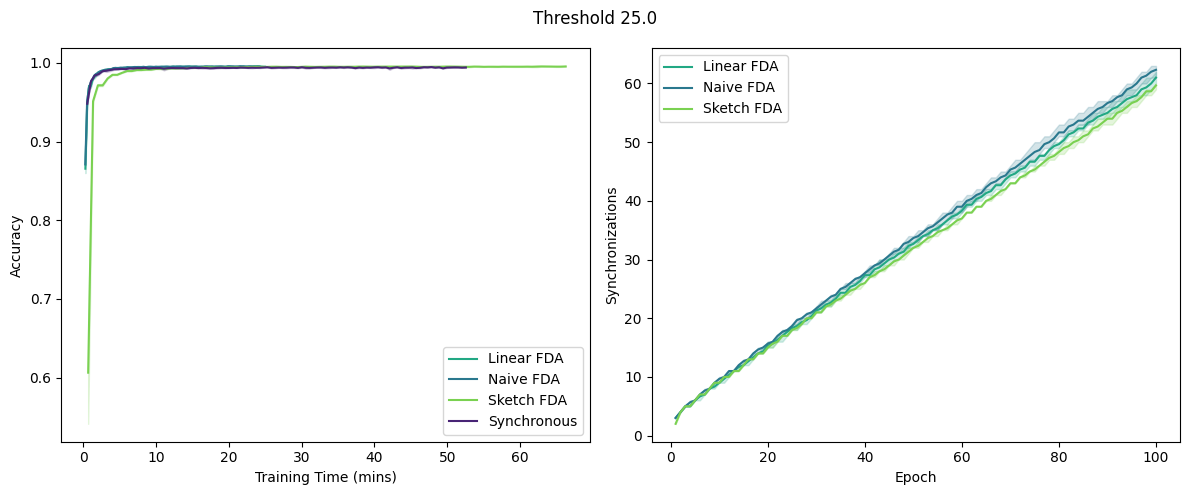

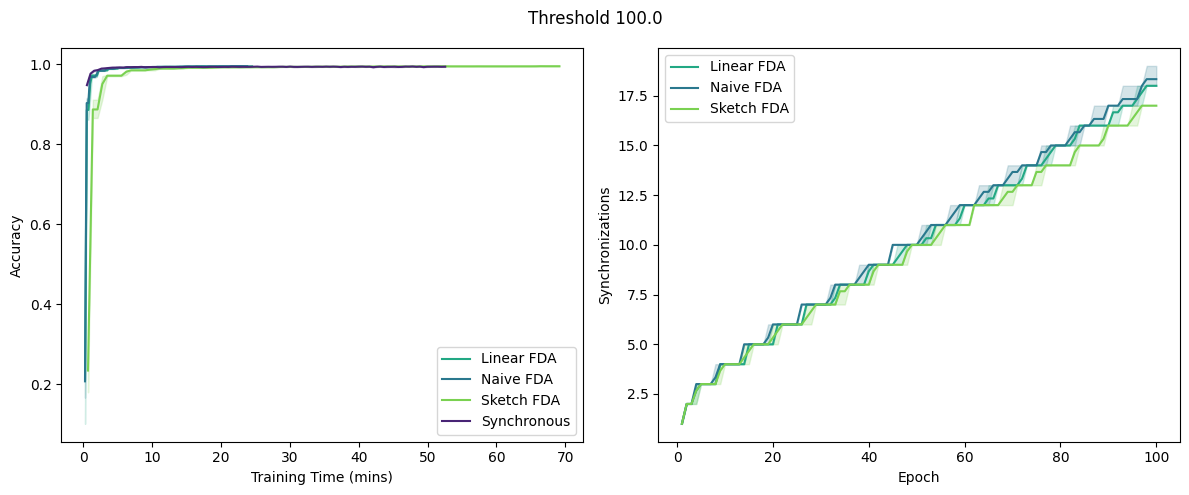

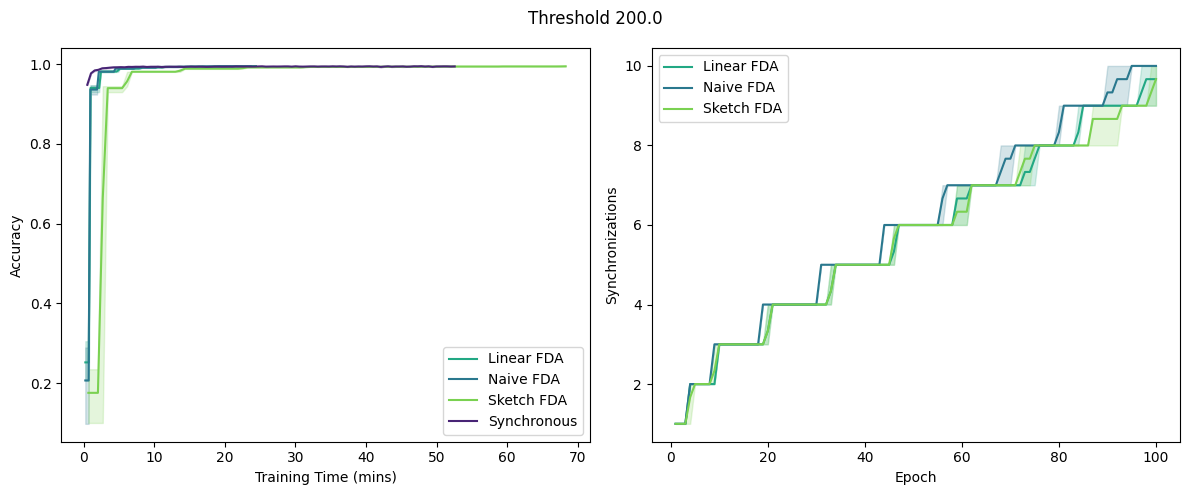

In [9]:
da = data_analysis("last_expers")
da.select_where({'clients': 16, 'batch_size': 128})
accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
distinct_threshold = da.df['info'].dropna()['threshold'].unique()

# For each individual number of threshold
for threshold in distinct_threshold:
    # Filter the DataFrame for rows where 'threshold' column is equal to the current 'threshold'
    filtered_accuracy_df = accuracy_df[(accuracy_df['threshold'] == threshold) | (accuracy_df['threshold'].isna())]
    filtered_syncs_df = syncs_df[(syncs_df['threshold'] == threshold) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    fig.suptitle(f"Threshold {threshold}")
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

## Syncs over Clients / Batch Size

In [10]:
da = data_analysis("last_expers")
da.select_where({'threshold': 50})
syncs_df = da.group_repeated_expers(['threshold', 'epoch', 'batch_size', 'clients'], 'epoch', 'syncs_y', True)
syncs_df = syncs_df[ (syncs_df['epoch']==100) & (syncs_df['threshold'].notna())]
syncs_df = syncs_df[['clients', 'batch_size', 'syncs_y_mean']]
numpy_array = syncs_df.values

## imshow

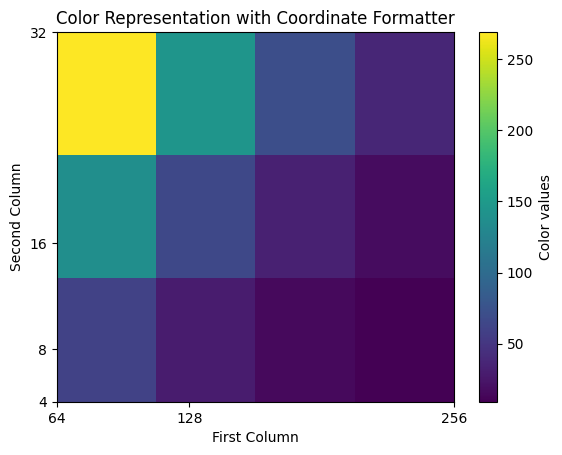

In [11]:
# Extracting columns for plotting
x_values = numpy_array[:, 1]
y_values = numpy_array[:, 0]
color_values = numpy_array[:, 2]

# Reshape data for imshow
grid_size = len(np.unique(x_values)), len(np.unique(y_values))
grid = color_values.reshape(grid_size)

# Create a plot with imshow
fig, ax = plt.subplots()
image = ax.imshow(grid, extent=[min(x_values), max(x_values), min(y_values), max(y_values)], cmap='viridis')

# Adjust the aspect ratio of the plot
ax.set_aspect('auto')

# Set only array values on the x-axis and y-axis
ax.set_xticks(np.unique(x_values))
ax.set_yticks(np.unique(y_values))

# Adding colorbar
cbar = plt.colorbar(image)
cbar.set_label('Color values')

# Adding labels and title
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_title('Color Representation with Coordinate Formatter')

# Define the custom coordinate formatter
def format_coord(x, y):
    col = np.searchsorted(np.unique(x_values), x)
    row = np.searchsorted(np.unique(y_values), y)
    z = grid[row, col]
    return f'x={x:1.4f}, y={y:1.4f}, z={z:1.4f}'

ax.format_coord = format_coord

# Show the plot
plt.show()



## trisurf

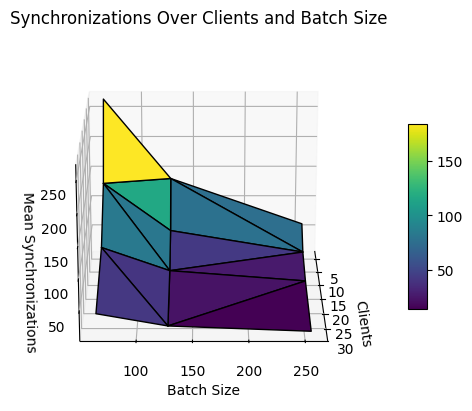

In [12]:

# Extracting columns from the numpy array
clients = numpy_array[:, 0]
batch_size = numpy_array[:, 1]
syncs_y_mean = numpy_array[:, 2]

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating a triangulation
triang = Triangulation(clients, batch_size)

# Plotting the wireframe
wireframe = ax.plot_trisurf(triang, syncs_y_mean, cmap='viridis', linewidth=1, edgecolor='black', antialiased=True)

# Adding labels
ax.set_title('Synchronizations Over Clients and Batch Size')
ax.set_xlabel('Clients')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Mean Synchronizations')

# Adding a colorbar
fig.colorbar(wireframe, ax=ax, shrink=0.5, aspect=10)

# Set a specific view (elevation, azimuthal angle)
ax.view_init(elev=20, azim=0)

# Show the plot
plt.show()

## scatter

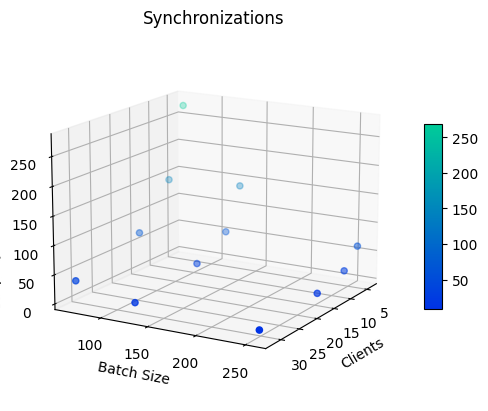

In [13]:
# Extracting columns from the numpy array
clients = numpy_array[:, 0]
batch_size = numpy_array[:, 1]
syncs_y_mean = numpy_array[:, 2]

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

new_cmap = truncate_colormap(plt.cm.winter, 0.2, 0.8)

# Scatter plot
scatter = ax.scatter(clients, batch_size, syncs_y_mean, c=syncs_y_mean, cmap=new_cmap)

# Adding labels
ax.set_title('Synchronizations')
ax.set_xlabel('Clients')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Mean Synchronizations')

# Adding a colorbar
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

# Set a specific view (elevation, azimuthal angle)
ax.view_init(elev=15, azim=30)

# Show the plot
plt.show()


## Time until 99.5 Accuracy

48


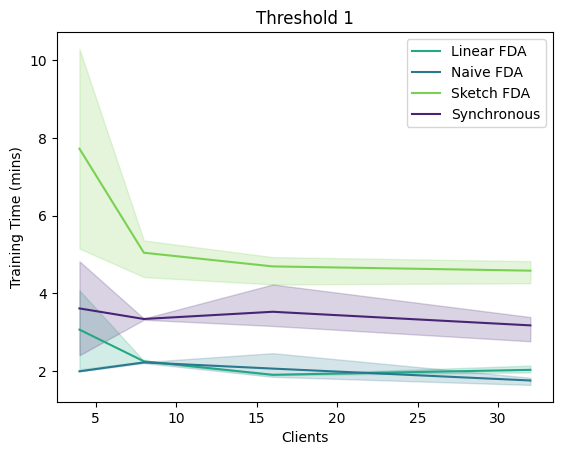

48


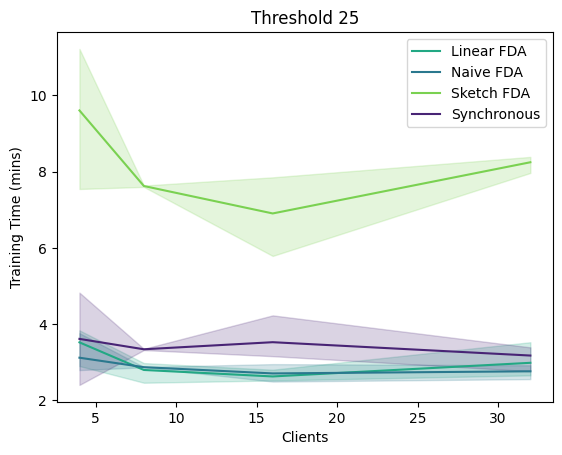

48


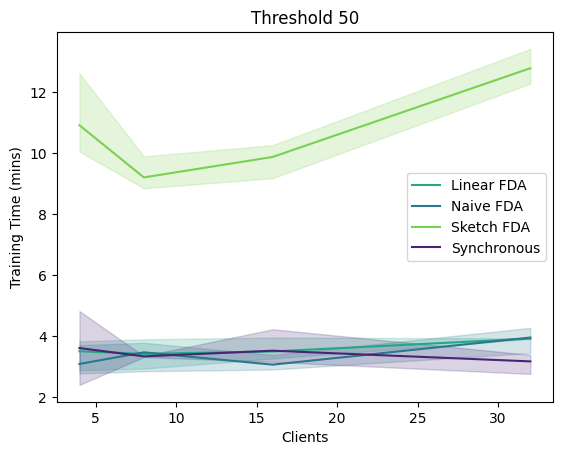

48


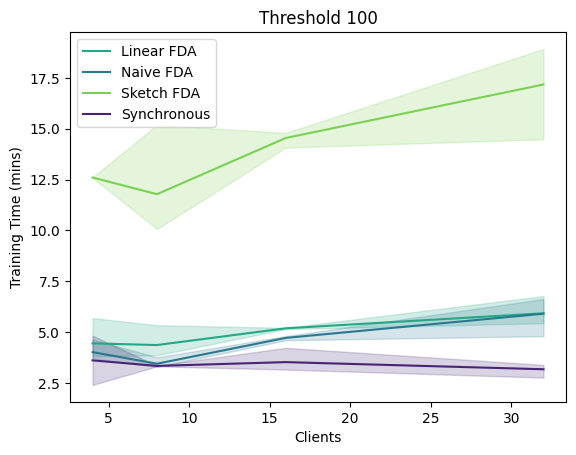

In [18]:
for threshold in (1, 25, 50, 100):
    da = data_analysis("last_expers")
    da.select_where({'threshold': threshold, 'batch_size': 128})
    accuracy_df = da.df['epoch']
    result_df = accuracy_df.groupby('exper_id').apply(lambda group: group[group['accuracy'] > 0.99].iloc[0])
    result_df = result_df[['clients', 'algorithm', 'time']]
    print(result_df.shape[0])

    # Group by 'clients' and 'algorithm', and calculate mean, min, and max for 'time'
    agg_df = result_df.groupby(['clients', 'algorithm'])['time'].agg(['mean', 'min', 'max']).reset_index()

    # Rename the columns for clarity
    agg_df.columns = ['clients', 'algorithm', 'mean_time', 'min_time', 'max_time']

    plt.figure()

    # Plot for filtered_accuracy_df
    for key, group in agg_df.groupby('algorithm'):
        plt.plot(group['clients'], group['mean_time'] / 60, label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['clients'], group['min_time']/60, group['max_time']/60, alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.title(f"Threshold {threshold}")
    plt.xlabel("Clients")
    plt.ylabel("Training Time (mins)")
    plt.legend()

    # Show the plot
    plt.show()

